# Custom Variables Examples 🎨✨

This notebook demonstrates how to create and use custom variables in Plotbot with the elegant syntax:
```python
custom_variable('variable_name', mathematical_expression)
```

**Features:**
- ✅ Simple math: `proton.anisotropy + 10`
- ✅ Variable operations: `proton.anisotropy / mag_rtn_4sa.bmag`
- ✅ Complex chained expressions: `proton.anisotropy / mag_rtn_4sa.br + proton.temperature`
- ✅ Automatic global accessibility
- ✅ Source tracking and updates
- ✅ Full plotting integration

In [1]:
# Remember to select the Plotbot Environment!
import plotbot
from plotbot import *
from plotbot.data_classes.custom_variables import custom_variable

print("✅ Plotbot and custom variables imported successfully!")


🕒 Starting import timing session: plotbot_full_initialization
  ✅ numpy: 0.116s
  🔧 Starting block: core_components
initialized server_access
initialized global_tracker
initialized plot_config
initialized data_cubby.
initialized plot_manager
CDF classes added to data_cubby type map.
  ✅ Block 'core_components' completed in 0.886s
  🔧 Starting block: psp_data_classes
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized proton_fits class
initialized alpha_fits class
initialized ham_class
  ✅ Block 'psp_data_classes' completed in 0.004s
  🔧 Starting block: wind_data_classes
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
  ✅ Block 'wind_data_classes' completed in 0.003s
  🔧 Starting block: data_cubby_registration
  ✅ Block 'data_cubby_registration' completed in 0.000s
  🔧 Starting block: auto_register_custom_classes
  ✅ Block 'auto_register_custom_classes' complet

In [2]:
# ------- 💽 CONFIGURE THE DEFAULT DATA DIRECTORY 💽 -------//
# This must be set before pyspedas is imported/run, as pyspedas caches configuration at import time.

config.data_dir = '../data'  # Go up one level to Plotbot/data/

import os
print(f"📁 Data directory absolute path: {os.path.abspath(config.data_dir)}")

# ------- 📡 CONFIGURE THE DEFAULT DATA SERVER 📡 -------//

config.data_server = 'berkeley'
# config.data_server = 'spdf'
# config.data_server = 'dynamic' #Will attempt to download from spdf first and then try berkeley

# ------- 🖨️ CONFIGURE PRINT MANAGER 🖨️ -------//
print_manager.show_status = True
# pm.show_debug = True      # Optional: uncomment for maximum detail
# pm.show_processing = True # Optional: uncomment for processing steps
# pm.show_datacubby = True  # Optional: uncomment for data caching steps


📁 Plotbot data directory changed: /Users/robertalexander/GitHub/Plotbot/data → ../data
🔧 SPEDAS_DATA_DIR updated for pyspedas compatibility
📁 Data directory absolute path: /Users/robertalexander/GitHub/Plotbot/data


In [3]:
# ----Print manager----/// ✨ All the available print manager options 

print_manager.show_status = True   # Status prints ⭐️ useful for basic status updates
print_manager.show_warning = True      # Keep warnings visible
print_manager.show_custom_debug = True  # Custom variable operations debugging - useful for this demo!

print_manager.show_debug = False   # Debug prints, helpful for debugging (will print a LOT of information)
print_manager.pyspedas_verbose = False
print_manager.show_processing = False # e.g. Processing mag_RTN_4sa...
print_manager.show_time_tracking = False  # For tracking datetime array inputs and outputs
print_manager.show_variable_testing = False
print_manager.show_test = False  # Turn off test-specific output
print_manager.show_module_prefix = False  # Show/Hide [print_manager]
print_manager.show_category_prefix = False  # Show/Hide [PROCESS], [TIME], etc.

print("🔧 Print manager configured for custom variables demo")

🔧 Print manager configured for custom variables demo


📊 Creating custom variable: proton.anisotropy + 10
[MATH] Performing add: anisotropy vs 10
Added source variable: proton.anisotropy
Using operation: add
Found 1 source variables
Made 'anisotropy_scalar_add' globally accessible as plotbot.anisotropy_scalar_add
Registered custom variable: anisotropy_scalar_add
Added source variable: proton.anisotropy
Using operation: add
Found 1 source variables
Made 'anisotropy_plus_ten' globally accessible as plotbot.anisotropy_plus_ten
Registered custom variable: anisotropy_plus_ten
✅ Custom variable created: anisotropy_plus_ten
   Type: <class 'plotbot.plot_manager.plot_manager'>
🤖 Plotbot starting (loading scientific libraries)...
🤖 Plotbot libraries loaded, proceeding...
🛰️ custom_data_type - acquiring variables: anisotropy_plus_ten
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
Added custom variable: anisotropy_plus_ten

📤 Custom variable 'anisotropy_plus_ten' requires data for calculation
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy

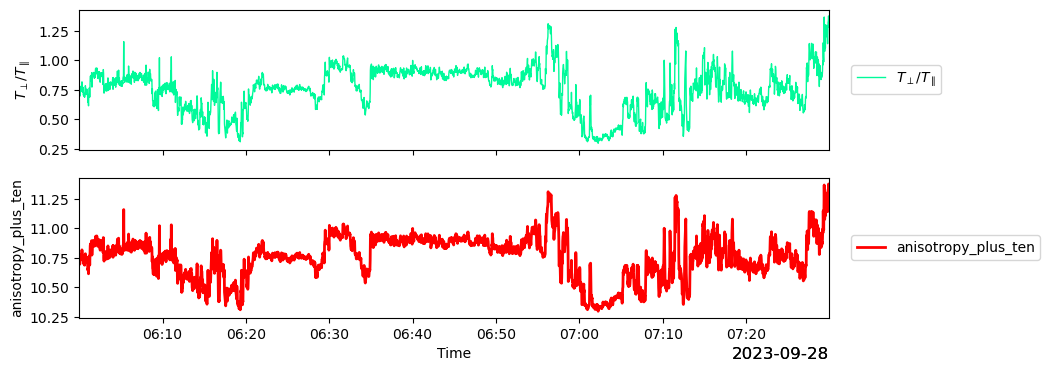

In [4]:
# ## Example 1: Simple Addition 🧮

# Use inline for static plots and widget for interactive plots
%matplotlib inline 
# %matplotlib widget

# Define a time range
trange = ['2023-09-28/06:00:00.000', '2023-09-28/07:30:00.000']

print("📊 Creating custom variable: proton.anisotropy + 10")

# Create a custom variable with our elegant syntax
anisotropy_plus_ten = custom_variable('anisotropy_plus_ten', proton.anisotropy + 10)

print(f"✅ Custom variable created: {anisotropy_plus_ten.subclass_name}")
print(f"   Type: {type(anisotropy_plus_ten)}")

# The variable is now globally accessible!
# Customize the appearance of the custom variable
anisotropy_plus_ten.color = 'red'
anisotropy_plus_ten.line_style = '-'
anisotropy_plus_ten.line_width = 2
anisotropy_plus_ten.legend_label = 'Anisotropy + 10'

# Plot original vs custom variable
plotbot(trange, proton.anisotropy, 1, anisotropy_plus_ten, 2)

📊 Creating custom variable: proton.anisotropy / mag_rtn_4sa.bmag
[MATH] Performing div: anisotropy vs bmag
⚠️ No datetime array available, returning full data
[MATH] One or both variables still corrupt after reload attempt
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.bmag
Using operation: div
Found 2 source variables
Made 'anisotropy_bmag_div' globally accessible as plotbot.anisotropy_bmag_div
Registered custom variable: anisotropy_bmag_div
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.bmag
Using operation: div
Found 2 source variables
Made 'aniso_over_bmag' globally accessible as plotbot.aniso_over_bmag
Registered custom variable: aniso_over_bmag
✅ Custom variable created: aniso_over_bmag
🎯 Creating scatter plot with custom variable...
🕒 TimeRangeTracker: Stored trange ['2023-09-28/06:00:00.000', '2023-09-28/07:30:00.000']
🛰️ mag_RTN_4sa - acquiring variables: bmag
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
Attempt

/Users/robertalexander/GitHub/Plotbot/plotbot/plot_manager.py:1016: RuntimeWarning: invalid value encountered in divide
  result = operation_func(self_aligned, other_aligned)


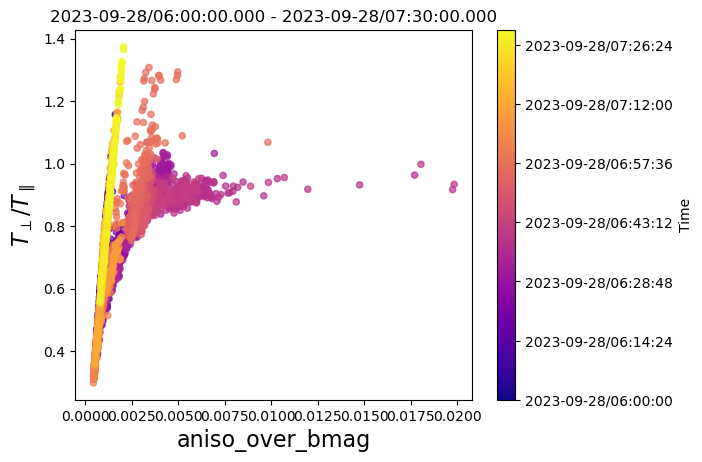

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '2023-09-28/06:00:00.000 - 2023-09-28/07:30:00.000'}, xlabel='aniso_over_bmag', ylabel='$T_\\perp/T_\\parallel$'>)

In [5]:
# ## Example 2: Variable Division 🔢

print("📊 Creating custom variable: proton.anisotropy / mag_rtn_4sa.bmag")

# Create a classic ratio variable:
aniso_over_bmag = custom_variable('aniso_over_bmag', proton.anisotropy / mag_rtn_4sa.bmag)

print(f"✅ Custom variable created: {aniso_over_bmag.subclass_name}")

# Customize appearance
aniso_over_bmag.color = 'blue'
aniso_over_bmag.line_width = 2
aniso_over_bmag.legend_label = 'Anisotropy / B_mag'

# Create a scatter plot using showdahodo
print("🎯 Creating scatter plot with custom variable...")
showdahodo(trange, aniso_over_bmag, proton.anisotropy)

📊 Creating complex custom variables with multiple operations...
   1. Creating: proton.anisotropy / mag_rtn_4sa.br + proton.temperature
[MATH] Performing div: anisotropy vs br
[MATH] Interpolating br to match anisotropy
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.br
Using operation: div
Found 2 source variables
Made 'anisotropy_br_div' globally accessible as plotbot.anisotropy_br_div
Registered custom variable: anisotropy_br_div
[MATH] Performing add: anisotropy_br_div vs temperature
[MATH] No interpolation needed or possible
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.br
Added source variable: proton.temperature
Using operation: add
Found 3 source variables
Made 'anisotropy_br_div_temperature_add' globally accessible as plotbot.anisotropy_br_div_temperature_add
Registered custom variable: anisotropy_br_div_temperature_add
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.br
Added source variable:

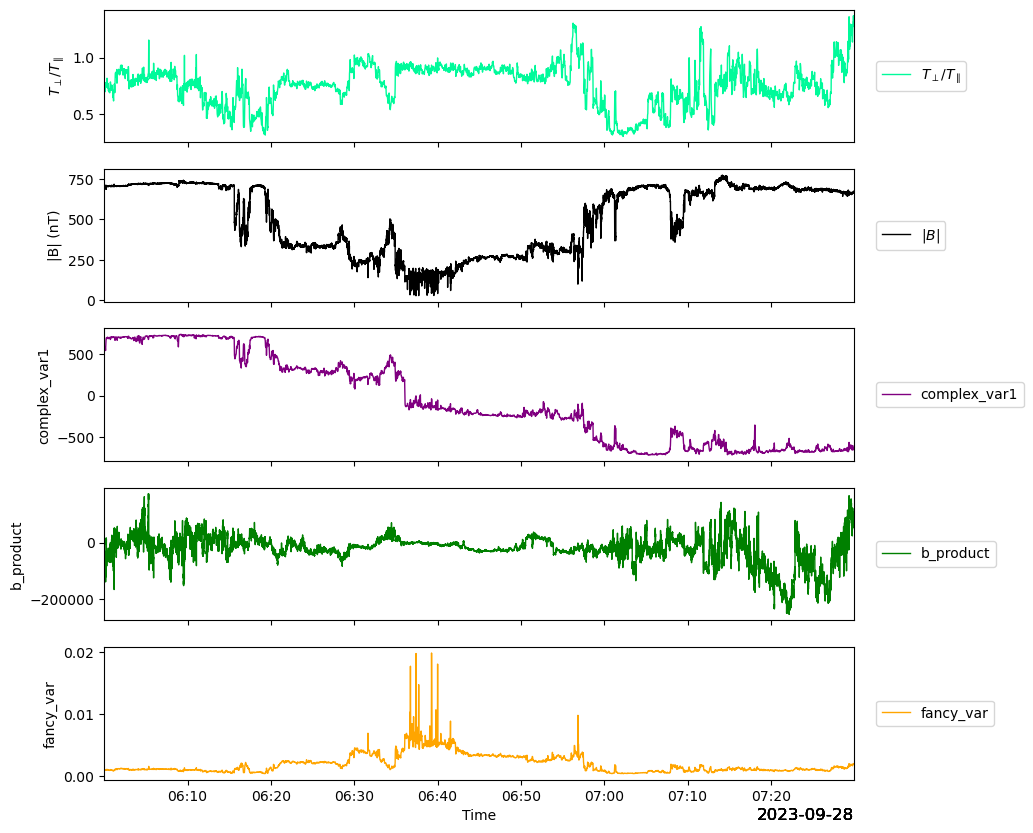

In [6]:
# ## Example 3: Complex Chained Expressions 🔗⚡

plt.options.reset() # Resetting options to ensure a clean slate

print("📊 Creating complex custom variables with multiple operations...")

# Example 1: Chained division and addition
print("   1. Creating: proton.anisotropy / mag_rtn_4sa.br + proton.temperature")
complex_var1 = custom_variable('complex_var1', proton.anisotropy / mag_rtn_4sa.br + proton.temperature)

# Example 2: Multiplication of magnetic field components
print("   2. Creating: mag_rtn_4sa.br * mag_rtn_4sa.bt")
b_product = custom_variable('b_product', mag_rtn_4sa.br * mag_rtn_4sa.bt)

# Example 3: Even more complex - nested operations
print("   3. Creating: (proton.anisotropy + 5) * mag_rtn_4sa.bmag / 100")
fancy_var = custom_variable('fancy_var', (proton.anisotropy + 5) * mag_rtn_4sa.bmag / 100)

print("✅ All custom variables created successfully!")

# Customize colors
complex_var1.color = 'purple'
complex_var1.legend_label = 'T_aniso/Br + T_proton'

b_product.color = 'green'
b_product.legend_label = 'Br × Bt'

fancy_var.color = 'orange'
fancy_var.legend_label = '(T_aniso+5)×B_mag/100'

# Create a comprehensive plot showing original and custom variables
print("🎨 Creating multi-panel plot...")
plotbot(trange, 
        proton.anisotropy, 1,      # Original variable
        mag_rtn_4sa.bmag, 2,       # Original variable  
        complex_var1, 3,           # Complex custom variable
        b_product, 4,              # Magnetic field product
        fancy_var, 5)              # Fancy nested expression


In [7]:
# ## Example 4: Testing Global Accessibility 🌍

print("🔍 Testing that custom variables are globally accessible...")

# Show that our variables are now globally accessible
print(f"✅ anisotropy_plus_ten is accessible: {type(anisotropy_plus_ten)}")
print(f"✅ aniso_over_bmag is accessible: {type(aniso_over_bmag)}")
print(f"✅ complex_var1 is accessible: {type(complex_var1)}")

# You can use them in further calculations!
print("\n📊 Creating a variable that uses other custom variables...")
super_custom = custom_variable('super_custom', anisotropy_plus_ten * aniso_over_bmag)

print(f"✅ Created super_custom variable: {super_custom.subclass_name}")
print("   This variable uses two other custom variables in its calculation!")


🔍 Testing that custom variables are globally accessible...
✅ anisotropy_plus_ten is accessible: <class 'plotbot.plot_manager.plot_manager'>
✅ aniso_over_bmag is accessible: <class 'plotbot.plot_manager.plot_manager'>
✅ complex_var1 is accessible: <class 'plotbot.plot_manager.plot_manager'>

📊 Creating a variable that uses other custom variables...
[MATH] Performing mul: anisotropy_plus_ten vs aniso_over_bmag
[MATH] No interpolation needed or possible
Added source variable: proton.anisotropy
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.bmag
Using operation: mul
Found 3 source variables
Made 'anisotropy_plus_ten_aniso_over_bmag_mul' globally accessible as plotbot.anisotropy_plus_ten_aniso_over_bmag_mul
Registered custom variable: anisotropy_plus_ten_aniso_over_bmag_mul
Added source variable: proton.anisotropy
Added source variable: proton.anisotropy
Added source variable: mag_rtn_4sa.bmag
Using operation: mul
Found 3 source variables
Made 'super_custom' glo

🕐 Testing custom variables with different time ranges...
📅 Original time range: ['2023-09-28/06:00:00.000', '2023-09-28/07:30:00.000']
📅 New time range: ['2023-09-28/08:00:00.000', '2023-09-28/09:00:00.000']
🎨 Plotting custom variables with new time range...
🤖 Plotbot starting (loading scientific libraries)...
🤖 Plotbot libraries loaded, proceeding...
🛰️ custom_data_type - acquiring variables: aniso_over_bmag, b_product
Added custom variable: aniso_over_bmag

Added custom variable: b_product

📤 Custom variable 'aniso_over_bmag' requires data for calculation
🛰️ mag_RTN_4sa - acquiring variables: bmag
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
Attempting Berkeley acquisition path for mag_RTN_4sa...
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 ../data/psp/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230928_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2023-09-28/08:00:00', '2023-09-28/09:00:00'].

📥 Requesting DataCubby to update/me

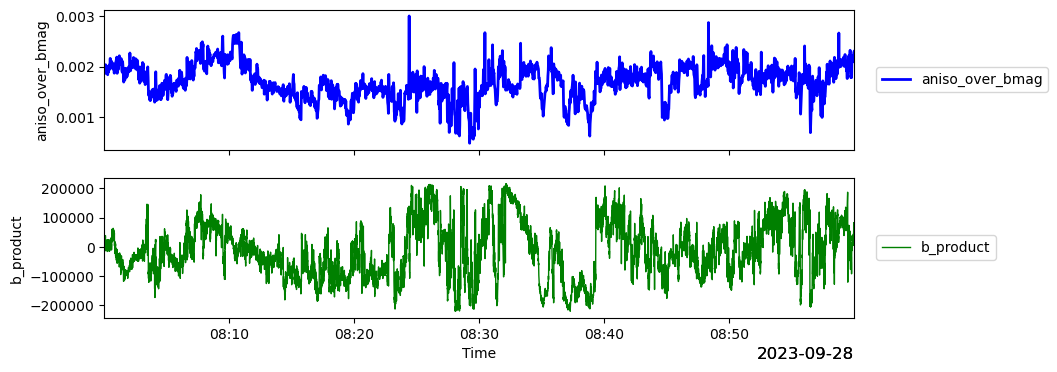

✅ Custom variables successfully adapt to new time ranges!


In [8]:
# ## Example 5: Custom Variables with Different Time Ranges ⏰

print("🕐 Testing custom variables with different time ranges...")

# Try a different time range to see if the variables update properly
new_trange = ['2023-09-28/08:00:00.000', '2023-09-28/09:00:00.000']

print(f"📅 Original time range: {trange}")
print(f"📅 New time range: {new_trange}")

# Plot the same custom variable with the new time range
print("🎨 Plotting custom variables with new time range...")
plotbot(new_trange, 
        aniso_over_bmag, 1,        # Our custom ratio variable
        b_product, 2)              # Our magnetic field product

print("✅ Custom variables successfully adapt to new time ranges!")


## 🔬 Advanced: Lambda Syntax for Complex NumPy Operations

For **complex NumPy operations** (like `np.arctan2`, `np.degrees`, `np.sqrt`, etc.), you **must** use lambda syntax to ensure the calculation is evaluated correctly when the data changes:

### ⚠️ When to Use Lambda:

- **NumPy functions**: `np.arctan2()`, `np.degrees()`, `np.sqrt()`, `np.log()`, etc.
- **Complex angle calculations**: Converting between coordinate systems
- **Multi-step transformations**: When your expression involves function calls

### ✅ Lambda Syntax Example:

The lambda syntax ensures your custom variable works correctly across different time ranges and doesn't suffer from stale data references.


In [9]:
# Example: Magnetic field angle calculation using lambda
import numpy as np

print("📐 Creating phi_B: magnetic field angle in degrees")
print("   Formula: np.degrees(np.arctan2(br, bn)) + 180")
print()

# ✅ CORRECT: Use lambda for complex NumPy operations
phi_B = custom_variable(
    'phi_B', 
    lambda: np.degrees(np.arctan2(mag_rtn_4sa.br, mag_rtn_4sa.bn)) + 180
)

# Set plot properties
phi_B.y_label = r'$\phi_B \ (\circ)$'
phi_B.color = 'purple'

print(f"✅ Custom variable created: {phi_B.subclass_name}")
print("   ⏳ Lambda will be evaluated when plotbot() is called")


📐 Creating phi_B: magnetic field angle in degrees
   Formula: np.degrees(np.arctan2(br, bn)) + 180

Made 'phi_B' globally accessible as plotbot.phi_B
Registered custom variable: phi_B
✅ Custom variable created: phi_B
   ⏳ Lambda will be evaluated when plotbot() is called


📊 Plotting phi_B with source variables...

🤖 Plotbot starting (loading scientific libraries)...
🤖 Plotbot libraries loaded, proceeding...
🛰️ mag_RTN_4sa - acquiring variables: br, bn
🛰️ custom_data_type - acquiring variables: phi_B
Added custom variable: phi_B

 
mag_RTN_4sa already calculated for the time range: 2023-09-28/06:00:00.000 to 2023-09-28/07:30:00.000
mag_RTN_4sa already calculated for the time range: 2023-09-28/06:00:00.000 to 2023-09-28/07:30:00.000
✅ All data already cached for 2 regular variables in the specified trange.
🕒 TimeRangeTracker: Stored trange ['2023-09-28/06:00:00.000', '2023-09-28/07:30:00.000']
[MATH] Performing add: br vs 180
Added source variable: mag_rtn_4sa.br
Using operation: add
Found 1 source variables
Made 'br_scalar_add' globally accessible as plotbot.br_scalar_add
Registered custom variable: br_scalar_add
Error setting data: property 'data' of 'plot_manager' object has no setter
Error setting marker_size: float() argument must be a string or a re

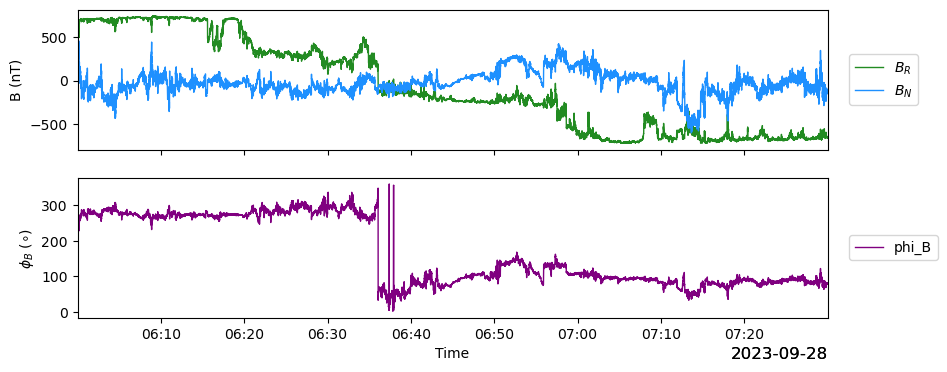


✨ Lambda-based custom variables work seamlessly with plotbot!


In [10]:
# Now plot with the lambda-based custom variable
print("📊 Plotting phi_B with source variables...")
print()

plotbot(trange, mag_rtn_4sa.br, 1, mag_rtn_4sa.bn, 1, phi_B, 2)

print()
print("✨ Lambda-based custom variables work seamlessly with plotbot!")


### 📋 Quick Reference: When to Use Lambda

| **Use Regular Syntax** | **Use Lambda Syntax** |
|------------------------|----------------------|
| `proton.anisotropy + 10` | `lambda: np.degrees(...)` |
| `proton.density * 2` | `lambda: np.arctan2(...)` |
| `mag_rtn_4sa.br / mag_rtn_4sa.bt` | `lambda: np.sqrt(...)` |
| Simple math operators: `+`, `-`, `*`, `/` | NumPy functions that wrap operations |

### 🎓 Key Takeaway:

- **Regular syntax**: For simple arithmetic with `+`, `-`, `*`, `/`
- **Lambda syntax**: For NumPy functions like `np.arctan2()`, `np.degrees()`, `np.sqrt()`, etc.

Lambda ensures your custom variable evaluates correctly every time it's used, especially when working with different time ranges! 🚀


## 🎯 Summary & Best Practices

### ✅ What We've Demonstrated:

1. **Simple Math**: `proton.anisotropy + 10`
2. **Variable Ratios**: `proton.anisotropy / mag_rtn_4sa.bmag`  
3. **Complex Expressions**: `proton.anisotropy / mag_rtn_4sa.br + proton.temperature`
4. **Global Accessibility**: Variables are automatically available throughout your session
5. **Chaining**: You can use custom variables to create other custom variables
6. **Time Range Flexibility**: Custom variables adapt to different time ranges

### 🛠️ Best Practices:

- **Descriptive Names**: Use clear, descriptive names for your custom variables
- **Color Coding**: Assign unique colors to distinguish your custom variables
- **Documentation**: Add legend labels to explain what your custom variables represent
- **Logical Grouping**: Create related variables together for easier management

### 🔮 Advanced Usage Ideas:

```python
# Physics-based custom variables
plasma_beta = custom_variable('plasma_beta', proton.pressure / mag_rtn_4sa.pressure)
temperature_ratio = custom_variable('temp_ratio', proton.temperature / proton.temperature_parallel)
field_strength = custom_variable('field_strength', (mag_rtn_4sa.br**2 + mag_rtn_4sa.bt**2 + mag_rtn_4sa.bn**2)**0.5)

# Normalized variables
normalized_density = custom_variable('norm_density', proton.density / proton.density.mean())
field_fluctuation = custom_variable('field_fluct', mag_rtn_4sa.bmag - mag_rtn_4sa.bmag.mean())
```

The custom variables system is now fully functional and ready for your space physics analysis! 🚀✨
